<a href="https://colab.research.google.com/github/notaflyingtoy/Contract-Classifier-and-Recommender/blob/main/FINAL_Deep_Learning_Contracts_Multi_Class_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##Multi Classification Problem CS987
- Team Name - Kerasic Park
- Members - Calum Lockhart 202077518, Joshua Murphy 202059689, Luke Hand 202091647, Anant Tyagi 202060104

## Overview and Abstract

For this multi classification problem, four different kinds of models were made and fitted to data in order to predict the class that a document belonged to.  The four kinds of models used were a standard machine learning one versus rest model, a deep neural network model, a model utilising LSTM and a model using BERT.  After fitting these models to the data a f1 score was calculated for each model and a test score was calculated on Kaggle in order to determine which model was the best for the task.

The main finding of our investigation was that the BERT model was the best model out of the four tested as it had a significantly higher score on Kaggle when predicting using the test dataset and it also had the best f1 score. 

##Methods

##Preprocessing

The data was processed differently for the models.  The one versus rest model and the deep neural network used the same preprocessed data.  The data was preprocessed differently for the LSTM model and it was also preprocessed differently again for the BERT model.

For the one versus rest and deep neural network models the data was preprocessed by cleaning the text columns of punctuation and special characters.  Stopwords was also used to remove common irrelevant words from these columns.  The most common words in the text columns Title and Description were then transformed into vectors and assigned values between 0 and 1 so that they could be used in the models.  These words were then used as columns of the dataframe.  The city name that was also present in the Title column was dropped.  The columns Country_Name, Country_Code and Sector were all dropped as they only contained 1 value in each column.  The Publication_Date column was encoded and one hot encoding was used for the Contract_Type column.  The Label column that consisted of 9 binary digits was changed into 9 new columns that each contained one of the binary digits.  Lastly, before the data was used in the model it was scaled using a standard scaler.  This was done so that the data could be used in the models.  This same processing was done on the testing set aswell.

For the LSTM model the data was processed slightly diffrently.  It should be noted that this model only uses the Title column as input.  Firstly, recycled code was used from a notebook we created that was used to preprocess the data for the first two models.  This was done so that we could quickly get the Title column into a state where it was easy to use Stopwords and clean it of punctuation and special characters.  This column was then transformed using a tokenizer and these tokens were changed into sequences, in order to keep the word placement, and padded so that each input had the same length.  The length chosen was 7 as this seemed like an average length of the titles.  The testing set underwent this this preprocessing also.

The preprocessing for the Bert model differed in that only the title column was utilised and it was put into a BERT tokeniser to transform the text input into BERT tokens.

After each time the data was preprocessed it was split into a training, validating and testing set.  This was done so that we could check the validation accuracy and also so the f1 scores could be calculated for each of the models.

##Models

The first model we tested was the baseline standard machine learning model.  For this we chose a one versus rest classifier as it is a standard machine learning multiclass classifier.

The second model was a dense deep neural network.  A grid search was utilised in order to get the best parameters for the model.  The model that the grid search returned consisted of 86 neurons per layer with 4 hidden layers and a learning rate of 0.003.  Each of the hidden layers used a Relu activation function.  The output layer consisted of 9 neurons with a Sigmoid activation.  This was because the label consisted of 9 binary elements.  The predictions for this model were rounded to either 1 or 0 as the Sigmoid activation returns values between 0 and 1.

The third model that was used was a LSTM that was adapted from reference 1.  This model consists of an input layer, a LSTM layer, a dense layer and a dense output layer with 9 neurons and the Sigmoid activation function.

The BERT model implements the pre-trained  “bert-based-uncased" model, a transformers model trained unsupervised on a large dataset of English text [2,3], thorough the huggingface transformers repository [4].  

The BERT model consisted of a shape = (46, ) input as the longest title was 46 words. The test data input was padded with 4 additional zeroes as the longest title in the test dataset was 42 words. Then a “BERT” layer which is actually 12 hidden layers in the transformer encoder and 12 self-attention heads. Next, a dropout layer with a dropout rate of 10% as specified in the configuration of the pre-trained model. Finally, there were 9 binary outputs with a sigmoid activation function.  

##Training

The training for all of the models consisted of training them on their respective preprocessed data.  This data consisted of a subset of the full training data as some of it was used a validation data and some as testing data for calculation of the f1 scores for the models.

In [ ]:
# Include your packages/imports here.

# Add your models here

#One versus rest model

ovr = OneVsRestClassifier(GaussianNB())

#Deep neural network model with best parameters from grid search

deep_model_best_param = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[1289]),
    keras.layers.Dense(86, activation="relu"),
    keras.layers.Dense(86, activation="relu"),
    keras.layers.Dense(86, activation="relu"),
    keras.layers.Dense(86, activation="relu"),
    keras.layers.Dense(9, activation="sigmoid")     
])

#LSTM model

model = tf.keras.Sequential([
    tf.keras.layers.Embedding(vocab_size, embedding_dim),
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(embedding_dim)),
    tf.keras.layers.Dense(embedding_dim, activation='relu'),
    tf.keras.layers.Dense(9, activation='sigmoid')
])

#BERT model


# Add your functions for training here


##Results

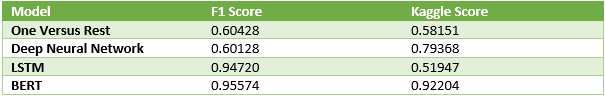

The table above shows each of the scores that the models got.  The one versus rest and deep neural network models both got similar f1 scores of around 0.6 but the deep neural network got a significantly better score on Kaggle.  The LSTM and BERT models both got very good f1 scores of around 0.95.  On Kaggle the BERT model achieved a score of 0.92204 which was the highest score that the models got.  The LSTM model however only manage to achieve a score of 0.51947, which was the lowest score out of the models.

We found that the most important features were the text features, specifically the Title column.  This is because BERT managed to get a very good score using only the Title column and LSTM managed to get a very good f1 score also using only the Title column in comparison to the other models that used a lot more of the data features.  

##Summary

The recommended model is the BERT model because it had the highest f1 score and Kaggle score.  It should be noted though that this model takes a considerable amount of time to train comapared to the other models however.  When implementing the chosen model, it may be worth considering adapting it for online learning to enable it to capitalise on the continual flow of information from the tenders collated by BIP Solutions and thus deliver more accurate results.  While BERT has been shown to have some cross language applications, particularly in classification tasks [5], further training could be performed using the relevant monolingual form of BERT. 

The other model that may be worth consideration is the LSTM model as this had a very good f1 score comparable with the BERT model but did not get nearly as good a score on Kaggle.  This could be due to the fact that it was only fitted using the Title column so if it were run with more input data or concatenated together with another model that took the numerical data as input, there is potential that it could get a much better overall score on Kaggle.

# References

[1] - Multi Class Text Classification with LSTM using TensorFlow 2.0 
       - Susan Li
    - https://towardsdatascience.com/multi-class-text-classification-with-lstm-using-tensorflow-2-0-d88627c10a35
      

[2] - BERT: Pre-training of Deep Bidirectional Transformers for Language Understanding - J.Devlin, M.Chang, K.Lee, K.Toutanova 
    - https://arxiv.org/pdf/1810.04805.pdf 

[3] - Multi-Label, Multi-Class Text Classification with BERT, Transformers and Keras - Emil Lykke Jensen 
    - https://towardsdatascience.com/multi-label-multi-class-text-classification-with-bert-transformer-and-keras-c6355eccb63a 

[4] - Transformers: State-of-the-Art Natural Language Processing
    - https://github.com/huggingface/transformers

[5] - Is Multilingual BERT Fluent in Language Generation? - S.Ronnqvist, J.Kanerva, T.Salakoski, F.Ginter
    - https://www.aclweb.org/anthology/W19-6204.pdf


# Code

Feature Processing
- Report how your processed the data here or in a separate notebook (provide link if a separate notebook is used).

Training and Validating etc.
- Show your working here – where you report all your training and validation, etc. that you performed in order to get the results.
- Note that it is important that you results can be replicated. All code to reproduce the final predictions must be included, along with any code that justifies your choices.

Any Additional Analysis
- Add in any additional analysis etc that you performed here.

##Code for One Versus Rest and Deep Neural Network models



In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from tensorflow import keras
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import OrdinalEncoder
from sklearn.feature_extraction.text import TfidfVectorizer
import nltk
from nltk.stem import WordNetLemmatizer
from nltk.stem.snowball import GermanStemmer
from sklearn.multiclass import OneVsRestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
import datetime

import sklearn

%tensorflow_version 2.x
import tensorflow as tf
from tensorflow import keras

#from nltk.stem.api import StemmerI
en_stm = WordNetLemmatizer()
de_stm = GermanStemmer()
from nltk.tokenize import word_tokenize
import os
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')
from nltk.corpus import stopwords
import re
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.


In [ ]:
train = pd.read_csv('/content/german-contracts-train.csv')
test = pd.read_csv('/content/german-contracts-test.csv')

In [ ]:
stop_words = stopwords.words(['german','english'])

In [ ]:
def split_right(s):
  n = s.find(':')
  a = s[n+1:]
  return a

def split_left(s):
  n = s.find(':')
  a = s[:n]
  return a

def OHE(df, col):
  # one hot encode column (col) in dataframe (df) then replace original column 
  # with one hot encoded column
  ohe = OneHotEncoder(sparse = False)
  ohe_values = ohe.fit_transform(df[[col]])
  ohe_cols = [col + '_' + s for s in ohe.categories_]
  df_ohe_values = pd.DataFrame(ohe_values,
                               columns = np.ndarray.flatten(np.array(ohe_cols)))
  df = pd.concat((df, df_ohe_values), axis = 1)
  df = df.drop(col, axis = 1)
  return df

  
#Code taken from https://towardsdatascience.com/journey-to-the-center-of-multi-label-classification-384c40229bff
#Removing all the punctuation from the title column
def cleanPunc(sentence): #function to clean the word of any punctuation or special characters
  cleaned = re.sub(r'[?|!|\'|"|#]',r'',sentence)
  cleaned = re.sub(r'[.|,|)|(|\|/|-]',r' ',cleaned)
  cleaned = cleaned.strip()
  cleaned = cleaned.replace("\n"," ")
  return cleaned

def stemSentence(sentence):
  token_words=word_tokenize(sentence)
  token_words
  stem_sentence=[]
  for word in token_words:
    # stem/lemmatize words in german & english
    stem_sentence.append(de_stm.stem(en_stm.lemmatize(word)))
    stem_sentence.append(" ")
  return "".join(stem_sentence)

def fit_vectorizer(df1, df2, col, min_df):
  df = df1.append(df2)
  vectorizer = TfidfVectorizer(min_df=min_df, 
                               norm='l2', 
                               strip_accents = 'unicode',  
                               ngram_range=(1, 2), 
                               analyzer = 'word',
                               lowercase= True)
  vectorizer.fit(df[col])
  return vectorizer

def vectorise_col(df, col, vectorizer):
  #vectorizer = TfidfVectorizer(min_df=min_df, 
  #                             norm='l2', 
  #                             strip_accents = 'unicode',  
  #                             ngram_range=(1, 2), 
  #                             analyzer = 'word',
  #                             lowercase= True)
  #vectorizer.fit(df[col])
  X = pd.DataFrame.sparse.from_spmatrix(vectorizer.transform(df[col]))
  df = df.join(X.add_prefix(col + '_vec_'))
  df.drop(col,axis = 1)
  return df

def prepare(df, title_vectorizer, description_vectorizer):
  t0 = datetime.datetime.now()
  # only 17 missing so remove
  df.nature_of_contract = df.nature_of_contract.fillna('empty')#df = df[~df['nature_of_contract'].isna()
  # after deleting 
  df = df.reset_index()

  # docid is completely unique so drop
  

  # titles have Germany-<city>:<title>
  # Germany is in every row so remove, city & title can be split
  df.title = df.title.str[8:] # remove 'Germany-' at start
  df['city'] = pd.Series(df['title']).apply(split_left)
  df['title'] = pd.Series(df['title']).apply(split_right)

  oe = OrdinalEncoder()

  oe_pd = oe.fit_transform(df[['publication_date']]) 
  df['enc_publication_date'] = oe_pd
  df = df.drop('publication_date', axis = 1)

  
  df = OHE(df, 'contract_type')
  #df = OHE(df, 'region')

  # single country so useless
  df = df.drop('country_name', axis = 1)
  df = df.drop('country_code', axis = 1)

  # most are missing - for the moment we will drop it
  df = df.drop('value', axis = 1)

  text_cols = ['title', 'description', 'awarding_authority']

  print('time 1: ', (datetime.datetime.now()-t0).seconds)

  for col_name in text_cols:
    df[col_name] = df[col_name].apply(cleanPunc)
    print('time 2: ', (datetime.datetime.now()-t0).seconds)
    # Getting rid of the stopwords
    # code changed from https://stackoverflow.com/questions/29523254/python-remove-stop-words-from-pandas-dataframe
    df[col_name] = df[col_name].apply((lambda x: ' '.join([word for word in x.split() if word not in (stop_words)])))
    print('time 3: ', (datetime.datetime.now()-t0).seconds)
    # stem / lemmatize words
    df[col_name] = df[col_name].apply(stemSentence)
    print('time 4: ', (datetime.datetime.now()-t0).seconds)

#  #vectorise text
  df = vectorise_col(df, 'title', title_vectorizer)
  print('time 5: ', (datetime.datetime.now()-t0).seconds)
  df = vectorise_col(df, 'description', description_vectorizer)
  print('time 6: ', (datetime.datetime.now()-t0).seconds)

  # for now drop to start analysis
  df = df.drop(['sector','title','description', 'city', 'awarding_authority',
                'index', 'nature_of_contract'], 
               axis = 1)
  
  if 'label' in df:
    # parse label into multiple bits
    df.label = df.label.astype(str)
    df.label = df.label.apply(lambda x: '{0:0>9}'.format(x))
    print('time 7: ', (datetime.datetime.now()-t0).seconds)
    # this line takes ages
    df_labels = pd.DataFrame(df.label.apply(lambda x: pd.Series(list(x)).astype(float)))
    print('time 8: ', (datetime.datetime.now()-t0).seconds)
    df_labels = df_labels.add_prefix('label_')
    label_names = df_labels.columns
    df = pd.concat((df, df_labels), axis = 1)
    # don't need
    df = df.drop(['category','label','docid']
                 , axis = 1)
    
    return df, label_names
  else:
    return df
  


def getY(df, label_names):
  Y = df[label_names]
  X = df.drop(label_names, axis = 1)
  return X, Y
  

def split(df, split1, split2):
  train, test = train_test_split(df, test_size = split1, random_state = 42)
  train, val = train_test_split(train, test_size = split2, random_state = 42)
  return train, test, val

def scale(X1, X2 = None, X3 = None):
  scaler = StandardScaler()
  cols = X1.columns
  X1_scaled = pd.DataFrame(scaler.fit_transform(X1), columns= cols)
  if not X2 is None and not X3 is None:
    X2_scaled = pd.DataFrame(scaler.transform(X2), columns= cols)
    X3_scaled = pd.DataFrame(scaler.transform(X3), columns= cols)
    return X1_scaled, X2_scaled, X3_scaled

def collapseLabel(x):
  return int(''.join(x))

def getPrediction(Y_pred, docid):
  #Y_pred array, docid Series
  docid = docid.reset_index()
  Y_pred = Y_pred.astype(int)
  Y_pred = Y_pred.astype(str)
  Y_pred = pd.DataFrame(Y_pred)
  Y_pred = pd.Series(Y_pred.apply(collapseLabel, axis = 1), name = 'label')
  Y_pred = docid.join(Y_pred)
  #Y_pred = Y_pred.drop('index',axis = 1) # docid is index
  return Y_pred

def fit_text_to_sequence(texts1, max_no_wrds, texts2 = None):
  if texts2 == None:
    texts = texts1
  else:
    texts = texts1.append(texts2)
  tokenizer = Tokenizer(num_words = max_no_wrds)
  tokenizer.fit_on_texts(texts)
  return tokenizer

def get_text_to_sequence(text, tokenizer, pad_len):
  sequences = tokenizer.texts_to_sequences(text)
  if pad_len != 0:
    sequences = pad_sequences(sequences, maxlen = pad_len)
  return sequences

In [ ]:
texts_title = train.title.apply(split_right)
texts_description = train.description
texts_title = texts_title.apply(cleanPunc)
texts_title = texts_title.apply(stemSentence)
texts_description = texts_description.apply(cleanPunc)
texts_description = texts_description.apply(stemSentence)

In [ ]:
tokenizer_title = fit_text_to_sequence(texts_title, 2000)
sequences_title = get_text_to_sequence(texts_title, tokenizer_title, 20)
tokenizer_description = fit_text_to_sequence(texts_description, 5000)
sequences_description = get_text_to_sequence(texts_description, tokenizer_title, 100)

(98320, 20)
(98320, 100)


In [ ]:
max_l = 0
sum_l = 0
for sequence in sequences_title:
  l = len(sequence)
  sum_l= sum_l+l
  if max_l<l: max_l = l
print('max len: ', max_l)
print('mean len: ', sum_l/len(sequences_title))

max_l = 0
sum_l = 0
for sequence in sequences_description:
  l = len(sequence)
  sum_l= sum_l+l
  if max_l<l: max_l = l
print('max len: ', max_l)
print('mean len: ', sum_l/len(sequences_description))

max len:  20
mean len:  20.0
max len:  100
mean len:  100.0


In [ ]:
print(test.shape)
# fit vectoriser on both sets so the train and test sets will have the same shape
title_vectorizer = fit_vectorizer(train, test, 'title', 500) 
description_vectorizer = fit_vectorizer(train, test, 'description', 700)
train, label_names = prepare(train, title_vectorizer, description_vectorizer)
test = prepare(test, title_vectorizer, description_vectorizer)
train

In [ ]:
print(train.head())
print(test.head())

   enc_publication_date  contract_type_award  ...  label_7  label_8
0                 199.0                  1.0  ...      0.0      0.0
1                 222.0                  0.0  ...      0.0      0.0
2                  30.0                  0.0  ...      0.0      0.0
3                 154.0                  0.0  ...      0.0      0.0
4                  50.0                  1.0  ...      0.0      0.0

[5 rows x 1298 columns]
        docid  enc_publication_date  ...  description_vec_892  description_vec_893
0  2535443526                 218.0  ...             0.000000                  0.0
1  2487195007                 195.0  ...             0.000000                  0.0
2  2573583192                 237.0  ...             0.000000                  0.0
3  2213029015                  34.0  ...             0.000000                  0.0
4  2218957610                  37.0  ...             0.314131                  0.0

[5 rows x 1290 columns]


In [ ]:
cols = [col for col in train.columns if 'title' in col]
print(len(cols))
cols = [col for col in train.columns if 'description' in col]
print(len(cols))

392
894


In [ ]:
df_train, df_test, df_val = split(train, .2, .25)
X_train, Y_train = getY(df_train, label_names)
X_test, Y_test = getY(df_test, label_names)
X_val, Y_val = getY(df_val, label_names)

In [ ]:
X_train_scaled, X_test_scaled, X_val_scaled = scale(X_train, X_test, X_val)

In [ ]:
#Scaling the test data so that we can make predictions on it

test2 = test.drop(['docid'],axis=1)
cols = test2.columns
scaler = StandardScaler()
test_scaled = pd.DataFrame(scaler.fit_transform(test2), columns=cols)

In [ ]:
t0 = datetime.datetime.now()
ovr = OneVsRestClassifier(GaussianNB())
print((datetime.datetime.now()-t0).seconds)
clf = ovr.fit(X_train_scaled,Y_train)
print((datetime.datetime.now()-t0).seconds)
clv_pred = clf.predict(X_test_scaled)

0
8


In [ ]:
#Get a f1 score of 0.60128 when testing with the seperated data from the training data

from sklearn.metrics import f1_score
f1_score(Y_test,clv_pred, average= 'weighted')

0.6012814281429145

In [ ]:
#Getting predictions for kaggle for the baseline machine learning model
#Kaggle score was 0.58151

pred = clf.predict(test_scaled)
pred = pred.round()
pred

Predictions_Machine_Learning_Baseline = getPrediction(pred, test.docid)
Predictions_Machine_Learning_Baseline = Predictions_Machine_Learning_Baseline.drop(['index'],axis = 1)
Predictions_Machine_Learning_Baseline

from google.colab import files
Predictions_Machine_Learning_Baseline.to_csv('Machine_Learning_Baseline_Predictions.csv') 
files.download('Machine_Learning_Baseline_Predictions.csv')

In [ ]:
#Tryin to get grid search working for number of layers and number of neurons
#Code taken from lab 2 solutions

def build_model(n_hidden=1, n_neurons=30, learning_rate=3e-3, input_shape=[1289]):

  model = keras.models.Sequential()
  model.add(keras.layers.InputLayer(input_shape=input_shape))
  for layer in range(n_hidden):
    model.add(keras.layers.Dense(n_neurons, activation="relu"))
  model.add(keras.layers.Dense(9, activation="sigmoid"))
  

  model.compile(loss="binary_crossentropy", optimizer="adam",metrics=["accuracy"])
  return model

In [ ]:
keras_reg = keras.wrappers.scikit_learn.KerasRegressor(build_fn=build_model)

In [ ]:
early_stopping_cb = keras.callbacks.EarlyStopping(patience=10, restore_best_weights=True)
history = keras_reg.fit(X_train_scaled, Y_train, epochs=100, validation_data=(X_val_scaled, Y_val), verbose=0, callbacks=[early_stopping_cb])
pred = keras_reg.predict(X_test_scaled)
pred = pred.round()
f1_score_test = f1_score(Y_test, pred, average= 'weighted')

In [ ]:
#Choosing the parameters to try

parameters = {
    "n_hidden":[(0),(1),(2),(3),(4)],
    "n_neurons":np.arange(20,100),
    "learning_rate": [(3e-2),(3e-3),(3e-4)]
}

In [ ]:
from scipy.stats import reciprocal
from sklearn.model_selection import RandomizedSearchCV

rnd_search_cv = RandomizedSearchCV(keras_reg, parameters, n_iter=10, cv=2)

In [ ]:
rnd_search_cv.fit(X_train_scaled, Y_train)

In [ ]:
print(rnd_search_cv.best_params_)
print(rnd_search_cv.best_score_)

#Best parameters, 86 neurons, 4 hidden layers, 0.003 learning rate

In [ ]:
#Creating a model with the above parameters

deep_model_best_param = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[1289]),
    keras.layers.Dense(86, activation="relu"),
    keras.layers.Dense(86, activation="relu"),
    keras.layers.Dense(86, activation="relu"),
    keras.layers.Dense(86, activation="relu"),
    keras.layers.Dense(9, activation="sigmoid")     
])

In [ ]:
#Compiling the model

optimizer = keras.optimizers.Adam(learning_rate=0.003)
deep_model_best_param.compile(loss="binary_crossentropy", optimizer=optimizer,metrics=["accuracy"])

In [ ]:
#Fitting the model

Deep_Model = deep_model_best_param.fit(X_train_scaled, Y_train, epochs=30, validation_data=(X_val_scaled,Y_val))

In [ ]:
#Getting the f1 score for the deep model with the best parameters
#Gave a f1 score of 0.60128

pred = deep_model_best_param.predict(X_test_scaled)
f1_score(Y_test,clv_pred, average= 'weighted')

In [ ]:
#Getting predictions for the model using the test dataframe

#test2 = test.drop(['docid'],axis=1)
#cols = test2.columns
#scaler = StandardScaler()
#test_scaled = pd.DataFrame(scaler.fit_transform(test2), columns=cols)
pred = deep_model_best_param.predict(test_scaled)
pred = pred.round()

Predictions_Deep_Model = getPrediction(pred, test.docid)
Predictions_Deep_Model = Predictions_Deep_Model.drop(['index'],axis = 1)

from google.colab import files
Predictions_Deep_Model.to_csv('Deep_Model_Predictions.csv') 
files.download('Deep_Model_Predictions.csv')

##Code for LSTM Model

In [ ]:
#Code was adapted from https://towardsdatascience.com/multi-class-text-classification-with-lstm-using-tensorflow-2-0-d88627c10a35 (Reference 1)

In [ ]:
import pandas as pd
import csv
import tensorflow as tf
import numpy as np
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
import nltk.corpus 
from nltk.corpus import stopwords
nltk.download('stopwords')
STOPWORDS = stopwords.words(['english'])

import matplotlib.pyplot as plt
from tensorflow import keras
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import OrdinalEncoder

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [ ]:
train = pd.read_csv('/content/german-contracts-train.csv')
test = pd.read_csv('/content/german-contracts-test.csv')

In [ ]:
train = train.drop(['nature_of_contract'], axis = 1)
test = test.drop(['nature_of_contract'], axis = 1)

In [ ]:
#Hyperparameters

vocab_size = 5000
embedding_dim = 64
max_length = 7
trunc_type = 'post'
padding_type = 'post'
oov_tok = '<OOV>'

In [ ]:
def split_right(s):
  n = s.find(':')
  a = s[n+1:]
  return a

def split_left(s):
  n = s.find(':')
  a = s[:n]
  return a

def OHE(df, col):
  # one hot encode column (col) in dataframe (df) then replace original column 
  # with one hot encoded column
  ohe = OneHotEncoder(sparse = False)
  ohe_values = ohe.fit_transform(df[[col]])
  ohe_cols = [col + '_' + s for s in ohe.categories_]
  df_ohe_values = pd.DataFrame(ohe_values,
                               columns = np.ndarray.flatten(np.array(ohe_cols)))
  df = pd.concat((df, df_ohe_values), axis = 1)
  df = df.drop(col, axis = 1)
  return df

def prepare(df):
  # only 17 missing so remove
  ##df = df[~df['nature_of_contract'].isna()]
  ##df['the_index'] = df.index
  # after deleting 
  ##df = df.reset_index()

  # titles have Germany-<city>:<title>
  # Germany is in every row so remove, city & title can be split
  df.title = df.title.str[8:] # remove 'Germany-' at start
  df['city'] = pd.Series(df['title']).apply(split_left)
  df['title'] = pd.Series(df['title']).apply(split_right)

  oe = OrdinalEncoder()

  oe_pd = oe.fit_transform(df[['publication_date']]) 
  df['enc_publication_date'] = oe_pd
  df = df.drop('publication_date', axis = 1)

  
  df = OHE(df, 'contract_type')
  #df = OHE(df, 'nature_of_contract')
  #df = OHE(df, 'region')

  # single country so useless
  df = df.drop('country_name', axis = 1)
  df = df.drop('country_code', axis = 1)

  # most are missing - for the moment we will drop it
  df = df.drop('value', axis = 1)

  if 'label' in df:
    # parse label into multiple bits
    df.label = df.label.astype(str)
    df.label = df.label.apply(lambda x: '{0:0>9}'.format(x))
    # this line takes ages
    df_labels = pd.DataFrame(df.label.apply(lambda x: pd.Series(list(x)).astype(float)))
    df_labels = df_labels.add_prefix('label_')
    df = pd.concat((df, df_labels), axis = 1)
    # don't need labels or categories
    df = df.drop('label', axis = 1)
    df = df.drop('category', axis = 1)
  return df

In [ ]:
train = prepare(train)

,docid,sector,title,description,awarding_authority,city,enc_publication_date,contract_type_award,contract_type_notice,label_0,label_1,label_2,label_3,label_4,label_5,label_6,label_7,label_8
0,2493527426,public,Cleaning services,Unterhalts- und Glasreinigung.\n,Staatliches Baumanagement Ems-Weser,Wilhelmshaven,199.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
1,2538215982,public,Engineering-design services for traffic insta...,ABS Karlsruhe-Stuttgart-Nürnberg-Leipzig/Dresd...,DB Netz AG,Dresden,222.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
2,2204943443,public,"Heating, ventilation and air-conditioning ins...",Nach Fertigstellung des ersten Bauabschnitts e...,Große Kreisstadt Germering,Germering,30.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
3,2417769175,public,Boards,Einrichtung Tafelsystem.\n,Gemeinde Limbach,Limbach,154.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,2242098706,public,Landscaping work for green areas,Im Projekt Neubau Filiale in Dortmund wird das...,"Deutsche Bundesbank, Beschaffungszentrum",Frankfurt-on-Main,50.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0


In [ ]:
test = prepare(test)

In [ ]:
test.title

0                                Software-related services
1         Architectural, construction, engineering and ...
2                              Integrated circuit packages
3                      Construction work for swimming pool
4                            Architectural design services
                               ...                        
24576     Architectural, engineering and planning services
24577     Architectural, construction, engineering and ...
24578                       Plumbing and drain-laying work
24579     Works for complete or part construction and c...
24580                             School cleaning services
Name: title, Length: 24581, dtype: object

In [ ]:
title = train.title
label = train.drop(['docid', 'sector', 'title', 'description',  
                          'awarding_authority', 'city', 
                          'enc_publication_date', 'contract_type_award', 
                          'contract_type_notice'], axis = 1)

In [ ]:
import re

def cleanPunc(sentence): #function to clean the word of any punctuation or special characters
    cleaned = re.sub(r'[?|!|\'|"|#]',r'',sentence)
    cleaned = re.sub(r'[.|,|)|(|\|/|-]',r' ',cleaned)
    cleaned = cleaned.strip()
    cleaned = cleaned.replace("\n"," ")
    return cleaned

In [ ]:
#Cleaning the title list

title= title.apply(cleanPunc)
title

0                                        Cleaning services
1        Engineering design services for traffic instal...
2        Heating  ventilation and air conditioning inst...
3                                                   Boards
4                         Landscaping work for green areas
                               ...                        
98315                  Construction work for swimming pool
98316    Research and testing facilities construction work
98317                  Switching station installation work
98318                                    Construction work
98319                           Survey conduction services
Name: title, Length: 98320, dtype: object

In [ ]:
#Applying stopwords to title list

title = title.apply((lambda x: ' '.join([word for word in x.split() if word not in (STOPWORDS)])))
title

0                                        Cleaning services
1        Engineering design services traffic installations
2        Heating ventilation air conditioning installat...
3                                                   Boards
4                             Landscaping work green areas
                               ...                        
98315                      Construction work swimming pool
98316        Research testing facilities construction work
98317                  Switching station installation work
98318                                    Construction work
98319                           Survey conduction services
Name: title, Length: 98320, dtype: object

In [ ]:
#Setting up validation data

train_size = int(len(title) * 0.8)

train_title = title[0: train_size]
train_label = label[0: train_size]

validation_title = title[train_size:]
validation_label = label[train_size:]

train_size1 = int(len(train_title) * 0.9)

train_title = title[0: train_size1]
train_label = label[0: train_size1]

test_title = title[train_size1:]
test_label = label[train_size1:]


print(train_size)
print(len(train_title))
print(len(train_label))
print(len(validation_title))
print(len(validation_label))
print(len(test_title))
print(len(test_label))

78656
70790
70790
19664
19664
27530
27530


In [ ]:
#Tokenizing all the words in the title

tokenizer = Tokenizer(num_words = vocab_size, oov_token=oov_tok)
tokenizer.fit_on_texts(train_title)
word_index = tokenizer.word_index

In [ ]:
dict(list(word_index.items())[0:10])

{'<OOV>': 1,
 'architectural': 8,
 'building': 10,
 'construction': 4,
 'engineering': 5,
 'installation': 7,
 'related': 9,
 'services': 2,
 'work': 3,
 'works': 6}

In [ ]:
#Changing these tokens into a list of sequences
#Making all the sequences in train, validation and test sequences the same length by padding
#Made the max length of a padded sequence 7 as I thought it was a good average for it

train_sequences = tokenizer.texts_to_sequences(train_title)
train_padded = pad_sequences(train_sequences, maxlen=max_length, padding=padding_type, truncating=trunc_type)

validation_sequences = tokenizer.texts_to_sequences(validation_title)
validation_padded = pad_sequences(validation_sequences, maxlen=max_length, padding=padding_type, truncating=trunc_type)

test_sequences = tokenizer.texts_to_sequences(test_title)
test_padded = pad_sequences(test_sequences, maxlen=max_length, padding=padding_type, truncating=trunc_type)

In [ ]:
#Making the LSTM model now

model = tf.keras.Sequential([
    tf.keras.layers.Embedding(vocab_size, embedding_dim),
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(embedding_dim)),
    tf.keras.layers.Dense(embedding_dim, activation='relu'),
    tf.keras.layers.Dense(9, activation='sigmoid')
])

In [ ]:
#Compiling the model

model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [ ]:
#Fitting the model

history = model.fit(train_padded, train_label, epochs=30, validation_data=(validation_padded, validation_label), verbose=2)

In [ ]:
#Getting f1 score for the padded test data

pred = model.predict(test_padded)
pred = pred.round()

from sklearn.metrics import f1_score
f1_score(test_label, pred, average= 'weighted')

In [ ]:
def collapseLabel(x):
    return int(''.join(x))

In [ ]:
def getPrediction(Y_pred, docid):
  #Y_pred array, docid Series
  docid = docid.reset_index()
  Y_pred = Y_pred.astype(int)
  Y_pred = Y_pred.astype(str)
  Y_pred = pd.DataFrame(Y_pred)
  Y_pred = pd.Series(Y_pred.apply(collapseLabel, axis = 1), name = 'label')
  Y_pred = docid.join(Y_pred)
  #Y_pred = Y_pred.drop('index',axis = 1) # docid is index
  return Y_pred

In [ ]:
title_test_final = test.title
title_test_final

In [ ]:
#Cleaning the test data

title_test_final = title_test_final.apply(cleanPunc)
title_test_final = title_test_final.apply((lambda x: ' '.join([word for word in x.split() if word not in (STOPWORDS)])))
tokenizer = Tokenizer(num_words = vocab_size, oov_token=oov_tok)
tokenizer.fit_on_texts(title_test_final)

In [ ]:
#Padding the test data

title_test_final_sequences = tokenizer.texts_to_sequences(title_test_final)
title_test_final_padded = pad_sequences(title_test_final_sequences, maxlen=max_length, padding=padding_type, truncating=trunc_type)

In [ ]:
#Getting predictions with the test data

pred = model.predict(title_test_final_padded)
pred = pred.round()
pred

Predictions_LSTM = getPrediction(pred, test.docid)
Predictions_LSTM = Predictions_LSTM.drop(['index'],axis = 1)
Predictions_LSTM

from google.colab import files
Predictions_LSTM.to_csv('LSTM_Predictions.csv') 
files.download('LSTM_Predictions.csv')

#BERT

In [ ]:
from google.colab import files
files.upload() #select kaggle.json

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"joshmurphy1","key":"bb8463773ae7ac48e9f681ece9e94f9a"}'}

In [ ]:
# skip this cell if you have directly downloaded csv
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/kaggle.json
!chmod 600 /root/.kaggle/kaggle.json
!kaggle competitions download -c cs98x-dl-task2-contract-clasification
!unzip german-contracts-test.csv.zip
!unzip german-contracts-train.csv.zip
!rm german-contracts-test.csv.zip
!rm german-contracts-train.csv.zip
# download city data from github to analyse part of title
#!git clone https://github.com/pensnarik/german-cities.git

 57% 9.00M/15.9M [00:00<00:00, 30.3MB/s]
100% 15.9M/15.9M [00:00<00:00, 40.2MB/s]
  0% 0.00/504k [00:00<?, ?B/s]
100% 504k/504k [00:00<00:00, 163MB/s]
  0% 0.00/3.83M [00:00<?, ?B/s]
100% 3.83M/3.83M [00:00<00:00, 124MB/s]
Archive:  german-contracts-test.csv.zip
  inflating: german-contracts-test.csv  
Archive:  german-contracts-train.csv.zip
  inflating: german-contracts-train.csv  


In [ ]:
train = pd.read_csv('/content/german-contracts-train.csv')
test = pd.read_csv('/content/german-contracts-test.csv')
#cities = pd.read_json('/content/german-cities/germany.json')
#cities = cities.drop(['coords'], axis = 1) # don't ever see us using this
#cities = cities[~(cities.population == '0 2103')] # bad value
#cities.population = cities.population.astype(float)

###Packages

In [ ]:
pip install transformers

     |████████████████████████████████| 2.2MB 6.6MB/s 
     |████████████████████████████████| 3.3MB 25.9MB/s 
     |████████████████████████████████| 870kB 35.6MB/s 
  Created wheel for sacremoses: filename=sacremoses-0.0.44-cp37-none-any.whl size=886084 sha256=f2a5346fe70c6a1934d1e87513e40ea7a905a35dbfcd138315398c80e94b8869
  Stored in directory: /root/.cache/pip/wheels/3e/fb/c0/13ab4d63d537658f448366744654323077c4d90069b6512f3c
Successfully built sacremoses


In [ ]:
from transformers import TFBertModel,  BertConfig, BertTokenizerFast

In [ ]:
from tensorflow.keras.layers import Input, Dropout, Dense
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.initializers import TruncatedNormal
from tensorflow.keras.losses import BinaryCrossentropy
from tensorflow.keras.metrics import BinaryAccuracy
from tensorflow.keras.utils import to_categorical

###Preprocessing Functions

In [ ]:
def joincols_to_label(cols, label = train["label"]):
  label = label.astype(str).apply(lambda x: '{0:0>9}'.format(x))
  df_labels = pd.DataFrame(label.apply(lambda x: pd.Series(list(x)).astype(float)))
  df_labels = df_labels.add_prefix('label_')
  df = pd.concat((cols, df_labels), axis = 1)
  return(df)


In [ ]:
#https://datascience.stackexchange.com/questions/45165/how-to-get-accuracy-f1-precision-and-recall-for-a-keras-model
#average=macro?
from keras import backend as K

def recall_m(y_true, y_pred):
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    possible_positives = K.sum(K.round(K.clip(y_true, 0, 1)))
    recall = true_positives / (possible_positives + K.epsilon())
    return recall

def precision_m(y_true, y_pred):
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    predicted_positives = K.sum(K.round(K.clip(y_pred, 0, 1)))
    precision = true_positives / (predicted_positives + K.epsilon())
    return precision

def f1_m(y_true, y_pred):
    precision = precision_m(y_true, y_pred)
    recall = recall_m(y_true, y_pred)
    return 2*((precision*recall)/(precision+recall+K.epsilon()))

In [ ]:
def tokenise_and_split(df, val_size):
  x = tokenizer(
    text=df.iloc[:,0].to_list(),
    add_special_tokens=True,
    max_length=max_length,
    truncation=True,
    padding=True, 
    return_tensors='tf',
    return_token_type_ids = False,
    return_attention_mask = False,
    verbose = True)
  
  x_train = tf.convert_to_tensor(x["input_ids"][:-val_size], name="input_ids")
  x_val = tf.convert_to_tensor(x["input_ids"][-2*val_size:-val_size], name="input_ids")
  x_test = tf.convert_to_tensor(x["input_ids"][-val_size:], name="input_ids")

  return x_train, x_val, x_test

In [ ]:
def label_split(df, val_size):
  y={}
  for i in range(0, 9):
    y["lab{}".format(i)] = df['label_{}'.format(i)]
  
  y_train = {}
  y_val = {}
  y_test = {}

  for key in y:
    y_train[key] = y[key][:-val_size]
    y_val[key] = y[key][-2*val_size:-val_size]
    y_test[key] = y[key][-10000:]

  return y_train, y_val, y_test

###Model

In [ ]:
# Name BERT Model
model_name = 'bert-base-uncased'
# Max length of tokens (for description only)
max_length = 100
# Load transformers config and set output_hidden_states to False
config = BertConfig.from_pretrained(model_name)
config.output_hidden_states = False
# Load BERT tokenizer
tokenizer = BertTokenizerFast.from_pretrained(pretrained_model_name_or_path = model_name, config = config)
# Load the Transformers BERT model
transformer_model = TFBertModel.from_pretrained(model_name, config = config)

Some layers from the model checkpoint at bert-base-uncased were not used when initializing TFBertModel: ['nsp___cls', 'mlm___cls']
- This IS expected if you are initializing TFBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing TFBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
All the layers of TFBertModel were initialized from the model checkpoint at bert-base-uncased.
If your task is similar to the task the model of the checkpoint was trained on, you can already use TFBertModel for predictions without further training.


In [ ]:
class BERTClass(keras.Model):
  def __init__(self, **kwargs):
    super().__init__(**kwargs)
    self.bert = transformer_model.layers[0]
    self.dropout = Dropout(config.hidden_dropout_prob, name='pooled_output')
    self.outputted={}
    
    for i in range(0, 9):
      self.outputted["lab{}".format(i)] = Dense(units=1, kernel_initializer=TruncatedNormal(stddev=config.initializer_range), name='lab{}'.format(i), activation="sigmoid")
      
    
  def call(self, inputs):
    
    bert_model = self.bert(inputs)[1]
    pooled_output = self.dropout(bert_model, training=True)
    
    outputted = {}
    for i in range(0, 9):
      outputted["lab{}".format(i)] = self.outputted["lab{}".format(i)](pooled_output)
    
    return{"lab0":outputted["lab0"],
           "lab1":outputted["lab1"],
           "lab2":outputted["lab2"],
           "lab3":outputted["lab3"],
           "lab4":outputted["lab4"],
           "lab5":outputted["lab5"],
           "lab6":outputted["lab6"],
           "lab7":outputted["lab7"],
           "lab8":outputted["lab8"]}

###Building Model

In [ ]:
bert_df_title = joincols_to_label(train["title"])

In [ ]:
val_size = 10000
x_train, x_val, x_test = tokenise_and_split(bert_df_title, val_size)
y_train, y_val, y_test = label_split(bert_df_title, val_size)

In [ ]:
bert = transformer_model.layers[0]
input_ids = Input(shape=(46,), name='input_ids', dtype='int32')
inputs = {'input_ids': input_ids}
bert_model = bert(inputs)[1]
dropout = Dropout(config.hidden_dropout_prob, name='pooled_output')
pooled_output = dropout(bert_model, training=False)
#output
outputs = {}
for i in range(0, 9):
  outputs["lab{}".format(i)] = Dense(units=1, kernel_initializer=TruncatedNormal(stddev=config.initializer_range), name='lab{}'.format(i), activation="sigmoid")(pooled_output)


In [ ]:
mod2 = BERTClass()

In [ ]:
optimizer = Adam(
    learning_rate=5e-05,
    epsilon=1e-08,
    decay=0.01,
    clipnorm=1.0)
# Set loss and metrics
loss = {x: BinaryCrossentropy(from_logits = True) for x in outputs}
metric = {x: f1_m for x in outputs}#, {x :f1_m for x in outputs}]

In [ ]:
# Compile the model
mod2.compile(
    optimizer = optimizer,
    loss = loss, 
    metrics = metric)

In [ ]:
history = mod2.fit(
    x=x_train,
    y=y_train,
    validation_data = (x_val, y_val),
    #callbacks = [tensorboard_cb, checkpoint_cb],
    batch_size=64,
    epochs=10)

Epoch 1/10
   1/1380 [..............................] - ETA: 20:59:35 - loss: 6.3867 - lab0_loss: 1.0285 - lab1_loss: 0.7231 - lab2_loss: 0.7142 - lab3_loss: 0.5570 - lab4_loss: 0.5316 - lab5_loss: 0.7344 - lab6_loss: 0.6344 - lab7_loss: 0.6781 - lab8_loss: 0.7855 - lab0_f1_m: 0.2222 - lab1_f1_m: 0.0000e+00 - lab2_f1_m: 0.0851 - lab3_f1_m: 0.0000e+00 - lab4_f1_m: 0.0000e+00 - lab5_f1_m: 0.0000e+00 - lab6_f1_m: 0.0000e+00 - lab7_f1_m: 0.0000e+00 - lab8_f1_m: 0.0656

KeyboardInterrupt: ignored

In [ ]:
y_test_pred = mod2.predict(x_test)

In [ ]:
y_test_df = pd.DataFrame.from_dict(y_test)
y_test_array = y_test_df.values.tolist()

In [ ]:
from sklearn.metrics import f1_score
f1_score(y_test_array, pred_to_arr(y_test_pred), average= 'weighted')

0.9557397011049106

In [ ]:
model.save_weights("bert_weights", save_format='tf')

### Test Data



In [ ]:

# Tokenize the input (takes some time)
x2 = tokenizer(
    text=test["title"].to_list(),
    add_special_tokens=True,
    max_length=46,
    truncation=True,
    padding=True, 
    return_tensors='tf',
    return_token_type_ids = False,
    return_attention_mask = False,
    verbose = True)


In [ ]:
x3 = tf.convert_to_tensor(np.pad(x2["input_ids"].numpy(), ((0, 0), (0, 4)), 'constant'), name="input_ids")

In [ ]:
predictions = mod2.predict(x={'input_ids': x3})

In [ ]:
def pred_to_arr(predictions, tofile=False, filename = None):
  predarray=[]
  for key in predictions:
    predarray.append(predictions[key].round())

  preds = np.concatenate(predarray, axis=1)
  #pred_list = ["".join(i) for i in preds.astype(int).astype(str)]
  if tofile == True:
    pred_list = ["".join(i) for i in preds.astype(int).astype(str)]
    pred_series = pd.DataFrame({'label':pred_list})
      ##type(test["docid"])
    docid = test["docid"].to_frame()
    prediction_output = docid.join(pred_series)
    #return(prediction_output)
    prediction_output.to_csv(filename, index="False")
    files.download(filename)
  else:
    return(preds)

In [ ]:
pred_to_csv(predictions, tofile=True, filename="bert_10_title_class_dropout.csv")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>